## Zadanie 1

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.

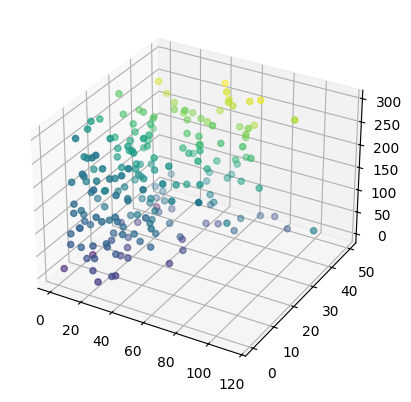

/Users/jankwiatkowski/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jankwiatkowski/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jankwiatkowski/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

advertising_data = pd.read_csv(os.path.join("data", "Advertising.csv"))

X, y = (advertising_data[["TV", "Radio", "Newspaper"]], advertising_data["Sales"])


def find_and_remove_outliers(X, y):
    feature_means = X.mean()
    feature_stdevs = X.std()

    outlier_mask = (
        (X < feature_means - 3 * feature_stdevs)
        | (X > feature_means + 3 * feature_stdevs)
    ).any(axis=1)

    X_cleaned = X[~outlier_mask]
    y_cleaned = y[~outlier_mask]

    return X_cleaned, y_cleaned


def scale_data(X, y, scaler=MinMaxScaler()):
    return scaler.fit_transform(X, y)


def prepare_data(X, y, scaler=MinMaxScaler(), train_size=0.8):
    X, y = find_and_remove_outliers(X, y)
    X = scale_data(X, y, scaler)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=21
    )

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = prepare_data(X, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X["Newspaper"], X["Radio"], X["TV"], c=y)
plt.show()

architectures = [(10, 10), (20, 20), (20, 20, 20), (21, 37), (50, 50, 50), (250, 100, 50), (400, 250, 100, 50)]
activation_funcs = ["relu", "tanh"]

results = []
for arch in architectures:
    for activation in activation_funcs:
        regressor = MLPRegressor(
            arch, activation, max_iter=2000, tol=1e-3, random_state=37
        )

        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse = mean_absolute_error(y_test, y_pred)

        results.append(
            {
                "arch": arch,
                "activation": activation,
                "mse": mse,
                "predicted": y_pred,
                "regressor": regressor,
            }
        )

In [ ]:
def print_mse(result):
    print(f"Arch: {result['arch']}, activation function: {result['activation']}")
    print(f"  MSE: {result['mse']:.4}")


for result in results:
    print_mse(result)

Arch: (10, 10), activation function: relu
  MSE: 1.203
Arch: (10, 10), activation function: tanh
  MSE: 2.731
Arch: (20, 20), activation function: relu
  MSE: 1.254
Arch: (20, 20), activation function: tanh
  MSE: 0.9281
Arch: (20, 20, 20), activation function: relu
  MSE: 1.264
Arch: (20, 20, 20), activation function: tanh
  MSE: 0.8122
Arch: (21, 37), activation function: relu
  MSE: 0.5278
Arch: (21, 37), activation function: tanh
  MSE: 0.708
Arch: (50, 50, 50), activation function: relu
  MSE: 2.674
Arch: (50, 50, 50), activation function: tanh
  MSE: 0.6382
Arch: (250, 100, 50), activation function: relu
  MSE: 3.117
Arch: (250, 100, 50), activation function: tanh
  MSE: 0.5989
Arch: (400, 250, 100, 50), activation function: relu
  MSE: 0.3663
Arch: (400, 250, 100, 50), activation function: tanh
  MSE: 4.84


## Zadanie 2

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

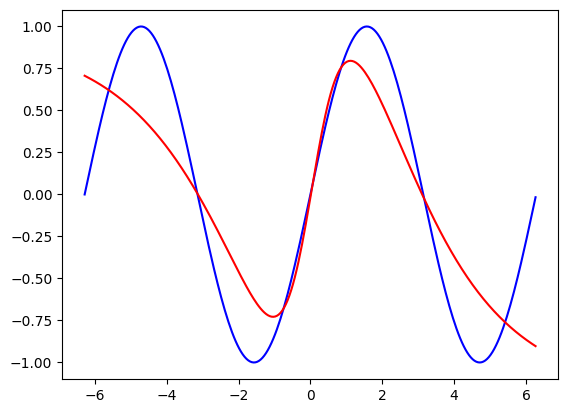

Wzór funkcji aproksymującej:
f(x) = +0.38063 * tanh(-0.23731 * x + 0.67437) -0.98171 * tanh(0.23325 * x + 0.037983) -0.23081 * tanh(-0.76318 * x + 0.18405) -0.48141 * tanh(0.3065 * x + 0.43469) -0.32406 * tanh(0.46611 * x + -1.2213) -0.75895 * tanh(-1.1641 * x + -0.097365) -0.71358 * tanh(-1.177 * x + 0.18313) +0.60369 * tanh(-0.23919 * x + -0.084768) -0.13116


In [ ]:
from math import pi

x = np.arange(-2 * pi, 2 * pi, 0.05)
y = np.sin(x)

regressor = MLPRegressor((8,), "tanh", max_iter=2000, random_state=69)
regressor.fit(x.reshape(-1, 1), y)
y_pred = regressor.predict(x.reshape(-1, 1))

plt.plot(x, y, "b")  # actual -> blue
plt.plot(x, y_pred, "r")  # predicted -> red
plt.show()

w1 = regressor.coefs_[0].flatten()
b1 = regressor.intercepts_[0]
w2 = regressor.coefs_[1].flatten()
b2 = regressor.intercepts_[1][0]

print("Wzór funkcji aproksymującej:")
print("f(x) = ", end="")

terms = [f"{w2[i]:+.5} * tanh({w1[i]:.5} * x + {b1[i]:.5})" for i in range(len(w1))]
formula = " ".join(terms)
formula += f" {b2:+.5}"

print(formula)

## Zadanie 3

Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (`diabetes`) z biblioteki `sklearn.datasets` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta. Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2. Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.

Proszę skomentować, jak architektura sieci wpływa na aproksymację i zaproponować najmniejszą sieć, dla której wyniki są dla państwa zadowalające.

In [ ]:
from sklearn.datasets import load_diabetes

diabates = load_diabetes(as_frame=True)

X, y = diabates.data, diabates.target

diabates.feature_names



['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']